<h1>Effect of Poisons & Treatments on Animal Survival Times</h1>

# Introduction
***
I will be analyzing a csv file on Animal Survival Times based on 3 poisons and 4 forms of treatment
---
<br>
    For this project, I will be analyzing a csv file on animal survival times when given one of 3 poisons and one of 4 forms of treatment. I will be attempting to see if there is a correlation between the poisons used and the form of treatment used against it. There are 48 total animals (4 randomized types), the poison (levels 1 - 3), the treatment (levels A - D), and the survival time (units of 10 hours). I will construct a multitude of graphs and analyze the results thoroughly to find a correlation below. I will also be finding the best confidence interval and trying to see which data structure performs best on the data set using regression. Ultimately, I will see which treatment performs best on which poison. The different treatments will be assigned as the independent variable.

# Body
---

In [1]:
# necessary imports for plotting and analyzing
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
from sklearn import tree
from treeviz import tree_print
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
%matplotlib inline

In [4]:
poisons_df = pd.read_csv("poisons.csv")
poisons_df

,Unnamed: 0,time,poison,treat
0,1,0.31,1,A
1,2,0.45,1,A
2,3,0.46,1,A
3,4,0.43,1,A
4,5,0.36,2,A
5,6,0.29,2,A
6,7,0.40,2,A
7,8,0.23,2,A
8,9,0.22,3,A
9,10,0.21,3,A


In [5]:
# we have no need for the identifier so it is removed
poisons_df = poisons_df.drop(['Unnamed: 0'], axis=1)
poisons_df

,time,poison,treat
0,0.31,1,A
1,0.45,1,A
2,0.46,1,A
3,0.43,1,A
4,0.36,2,A
5,0.29,2,A
6,0.40,2,A
7,0.23,2,A
8,0.22,3,A
9,0.21,3,A


In [6]:
poisons_df.describe()

,time,poison
count,48.000000,48.000000
mean,0.479375,2.000000
std,0.252859,0.825137
min,0.180000,1.000000
25%,0.300000,1.000000
50%,0.400000,2.000000
75%,0.622500,3.000000
max,1.240000,3.000000


In [7]:
columns_rows = poisons_df.shape

In [8]:
print("The number of rows is: {x}".format(x = columns_rows[0]))

The number of rows is: 48


In [9]:
print("The number of columns is: {x}".format(x = columns_rows[1]))

The number of columns is: 3


<h4>Here are some basic stats on the mean, mode, min, & max of the columns:</h4>

In [10]:
poisons_df['time'].mode()

0    0.23
1    0.31
2    0.45
dtype: float64

In [11]:
poisons_df['poison'].mode()

0    1
1    2
2    3
dtype: int64

In [12]:
poisons_df['treat'].mode()

0    A
1    B
2    C
3    D
dtype: object

In [13]:
poisons_df['time'].mean()

0.4793749999999999

In [14]:
poisons_df['poison'].mean()

2.0

In [15]:
poisons_df['time'].max()

1.24

In [16]:
poisons_df['poison'].max()

3

In [17]:
poisons_df['time'].min()

0.17999999999999999

In [18]:
poisons_df['poison'].min()

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d166c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ee89cf8>]], dtype=object)

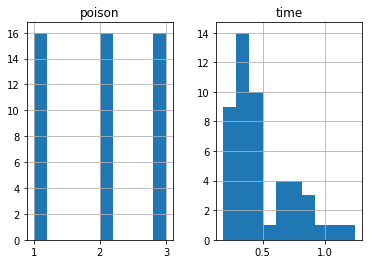

In [19]:
poisons_df.hist()

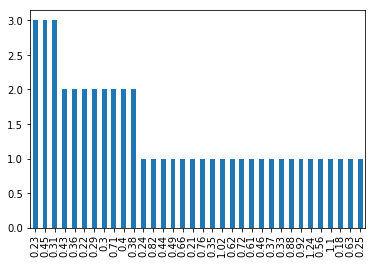

In [20]:
poisons_df['time'].value_counts().plot(kind="bar")

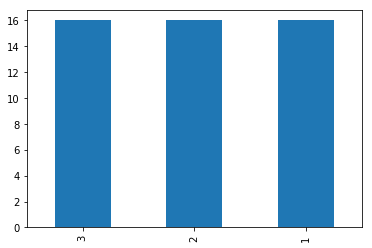

In [21]:
poisons_df['poison'].value_counts().plot(kind="bar")

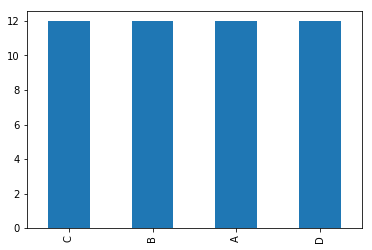

In [22]:
poisons_df['treat'].value_counts().plot(kind="bar")

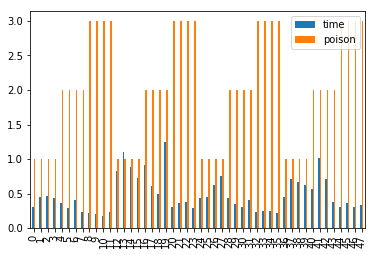

In [23]:
poisons_df.plot(kind='bar')

<h4>This dataset has both categorical and numerical variables which makes it interesting to work with. It seems that every poison was tested against every kind of treatment which I believe will allow a fair comparison and analysis. All the dependent variables seem to be equally represented. Each poison was tested on 16 different animals with every type of treatment. After briefly looking at the histogram, it looks like poison 3 causes the quickest deaths and poison 2 causes the slowest deaths. I will now begin to build more complicated models and really analyze the data.</h4>

In [24]:
poisons_df.head()

,time,poison,treat
0,0.31,1,A
1,0.45,1,A
2,0.46,1,A
3,0.43,1,A
4,0.36,2,A


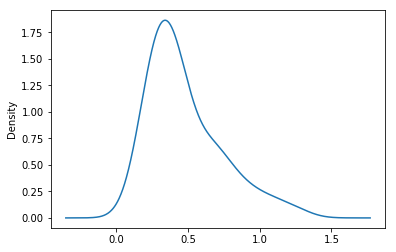

In [25]:
poisons_df.loc[:, 'time'].plot.kde()

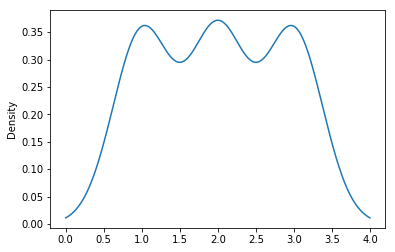

In [26]:
poisons_df.loc[:, 'poison'].plot.kde()

<h4>The time variable is unimodal because it has 1 mode. The poison variable is multimodal because there are 3 types of poisons, which makes sense.</h4>

In [27]:
sns.set()

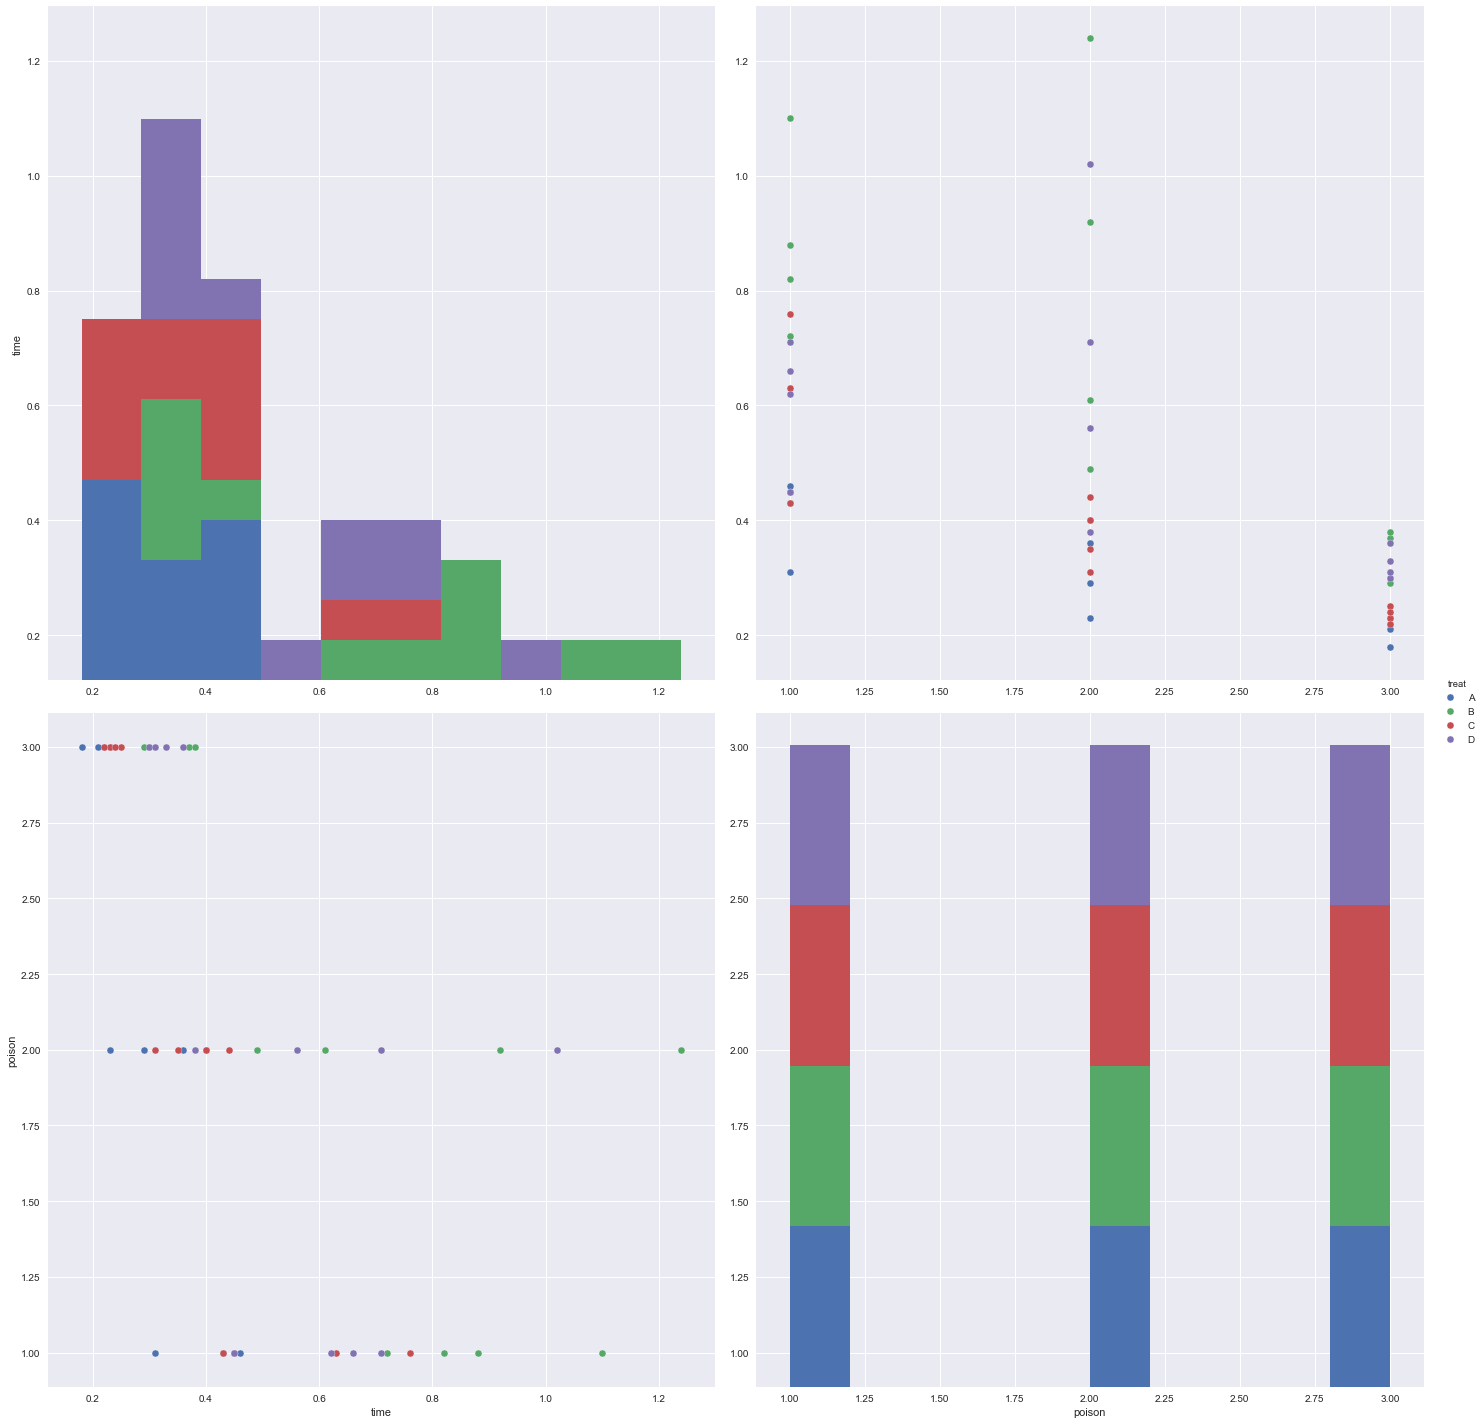

In [28]:
sns.pairplot(poisons_df, hue="treat", size=10)

<h4>All the dependent variables look to be equally represented on each level. It seems that scatterplot time vs poison & poison vs time give us some valuable information. The other scatterplots do not give any useful information. It seems that treatment B has the best effect on the poisons followed by D, C, and finally A. It also looks like poison 3 is the most lethal followed by 2 and then 1.</h4>

In [29]:
feature_df = poisons_df.drop(['treat'], axis=1)
feature_df

,time,poison
0,0.31,1
1,0.45,1
2,0.46,1
3,0.43,1
4,0.36,2
5,0.29,2
6,0.40,2
7,0.23,2
8,0.22,3
9,0.21,3


In [30]:
target_df = pd.DataFrame(poisons_df['treat'])
target_df.describe()

,treat
count,48
unique,4
top,C
freq,12


In [31]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [32]:
dtree.fit(feature_df, target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
tree_print(dtree,feature_df)

if time =< 0.4750000238418579: 
  |then if time =< 0.26999998092651367: 
  |  |then if time =< 0.23499999940395355: 
  |  |  |then if time =< 0.2150000035762787: 
  |  |  |  |then A
  |  |  |  |else if poison =< 2.5: 
  |  |  |  |  |then A
  |  |  |  |  |else if time =< 0.22499999403953552: 
  |  |  |  |  |  |then A
  |  |  |  |  |  |else A
  |  |  |else C
  |  |else if poison =< 2.5: 
  |  |  |then if time =< 0.3700000047683716: 
  |  |  |  |then if time =< 0.30000001192092896: 
  |  |  |  |  |then A
  |  |  |  |  |else if time =< 0.35500001907348633: 
  |  |  |  |  |  |then if poison =< 1.5: 
  |  |  |  |  |  |  |then A
  |  |  |  |  |  |  |else C
  |  |  |  |  |  |else A
  |  |  |  |else if time =< 0.38999998569488525: 
  |  |  |  |  |then D
  |  |  |  |  |else if time =< 0.4449999928474426: 
  |  |  |  |  |  |then if time =< 0.4350000023841858: 
  |  |  |  |  |  |  |then if time =< 0.4150000214576721: 
  |  |  |  |  |  |  |  |then A
  |  |  |  |  |  |  |  |else A
  |  |  |  |  |  |

In [34]:
predict_array = dtree.predict(feature_df)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['treat']

In [35]:
predicted_labels.head()

,treat
0,A
1,A
2,A
3,A
4,A


In [36]:
target_df.head()

,treat
0,A
1,A
2,A
3,A
4,A


In [37]:
predicted_labels.equals(target_df)

False

In [38]:
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 0.8541666666666666


<h5>This is the tree model that will be used because it has the highest accuracy. All depths under 8 give a low accuracy score but none can give an accuracy score 10% within the accuracy of 1.</h5>

---

In [39]:
X = poisons_df.drop(['treat'], axis=1)

In [40]:
y = poisons_df['treat']

In [41]:
model = tree.DecisionTreeClassifier(criterion='entropy')

In [42]:
scores = cross_val_score(model, X, y, cv=3)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {}".format(scores.mean()))

Fold Accuracies: [ 0.375  0.5    0.25 ]
Accuracy: 0.375


In [43]:
model = tree.DecisionTreeClassifier()
param_grid = {'max_depth': list(range(1,11)),
              'criterion': ['entropy', 'gini']
              }

In [44]:
grid = GridSearchCV(model, param_grid, cv=3)

In [45]:
grid.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 7}


In [47]:
print("Best tree:")
tree_print(grid.best_estimator_,X)

Best tree:
if time =< 0.4750000238418579: 
  |then if time =< 0.26999998092651367: 
  |  |then if time =< 0.23499999940395355: 
  |  |  |then if time =< 0.2150000035762787: 
  |  |  |  |then A
  |  |  |  |else if poison =< 2.5: 
  |  |  |  |  |then A
  |  |  |  |  |else if time =< 0.22499999403953552: 
  |  |  |  |  |  |then A
  |  |  |  |  |  |else A
  |  |  |else C
  |  |else if poison =< 2.5: 
  |  |  |then if time =< 0.3700000047683716: 
  |  |  |  |then if time =< 0.30000001192092896: 
  |  |  |  |  |then A
  |  |  |  |  |else if time =< 0.35500001907348633: 
  |  |  |  |  |  |then if poison =< 1.5: 
  |  |  |  |  |  |  |then A
  |  |  |  |  |  |  |else C
  |  |  |  |  |  |else A
  |  |  |  |else if time =< 0.38999998569488525: 
  |  |  |  |  |then D
  |  |  |  |  |else if time =< 0.4449999928474426: 
  |  |  |  |  |  |then if time =< 0.4350000023841858: 
  |  |  |  |  |  |  |then A
  |  |  |  |  |  |  |else C
  |  |  |  |  |  |else if time =< 0.45499998331069946: 
  |  |  |  |  |

In [48]:
predict_y = grid.best_estimator_.predict(X)
actual_y = y

In [49]:
print("Accuracy: {}".format(accuracy_score(actual_y, predict_y)))

Accuracy: 0.8541666666666666


In [50]:
def bootstrap(model,D,target_name):
    rows,__ = D.shape
    acc_list = []
    for i in range(200):
        B = D.sample(n=rows,replace=True)
        X = B.drop(target_name,1)
        y = B[target_name]
        train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8)
        model.fit(train_X, train_y)
        predict_y = model.predict(test_X)
        acc_list.append(accuracy_score(test_y, predict_y))
    acc_list.sort()
    ub = percentile(acc_list,97.5)
    lb = percentile(acc_list,2.5)
    return (lb, ub)

In [51]:
t1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
t2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)

In [52]:
print("Confidence interval max_depth=4: {}".format(bootstrap(t1,poisons_df,'treat')))
print("Confidence interval max_depth=None: {}".format(bootstrap(t2,poisons_df,'treat')))

/Users/gabe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Confidence interval max_depth=4: (0.29999999999999999, 0.90000000000000002)
Confidence interval max_depth=None: (0.29999999999999999, 0.90000000000000002)


<h4>I used a cross validation of 3 becuase the dataset did not have more than 50 rows. This also gave an accuracy that worked really well.</h4>

---

In [53]:
model = MLPClassifier(hidden_layer_sizes=(15,),max_iter=1000)

In [54]:
scores = cross_val_score(model,X,y, cv=3)
print("fold accuracies:{}".format(scores))
print("accuracy:{}".format(scores.mean()))

/Users/gabe/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gabe/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold accuracies:[ 0.375  0.375  0.375]
accuracy:0.375


/Users/gabe/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [55]:
model = KNeighborsClassifier(n_neighbors=5)

In [56]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,train_size=.8)
model.fit(train_X,train_Y)
predict_Y = model.predict(test_X)
print("train-test accuracy:{}".format(accuracy_score(test_Y,predict_Y)))

train-test accuracy:0.3


/Users/gabe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [57]:
scores = cross_val_score(model,X,y,cv=5)
print("fold accuracies{}".format(scores))
print("XV Accuracy:{}".format(scores.mean()))

fold accuracies[ 0.41666667  0.58333333  0.375       0.625       0.375     ]
XV Accuracy:0.475


<h4>Both models have approximately the same accuracy between 0.2 and 0.6. It is dependent on the data currently being used.</h4>

In [58]:
print("R^2 score: {}".format(model.score(X,y)))

R^2 score: 0.5416666666666666


<h4>The R^2 score is about 50% so it doesn't really tell us if the model is a good fit or not. This means the model used variables that are ok and can be worked with.</h4>

<h1>Conclusion<h1>

<h5>The artificial neural network and confidence intervals show that this data can be worked without a large error. After analyzing and reviewing all the data, it is determined that poison 3 is the most lethal to the animal's survival time. It has the most clusters in a spot with the least time (quicker death). Poison 2 and 1 have their clusters spread around, but 2 has more in a spot with a lower time. So that means the least lethal poison is poison 1. After more analyzing, it looks like each treatments has a different effect on each poison regarding survival times. It is evident that treatment B works the best because the animal survival times are the highest when this treatment is used, no matter which poison it is. Next would be treatment D because most of the spots are less than B and higher than C and A. The next would be treatment C. Treatment C lies around the bottom but A clearly lies the lowest. Each treatment approximately does the same against each type of poison. So in conclusion, poison 3 is the most lethal and treatment B is the most effective. If there were more details in the dataset, we could determine what the name/composition of the poison and treatment that were used against a specific animal to do scientific research.</h5> 

<h1>Appendix</h1>

- https://vincentarelbundock.github.io/Rdatasets/doc/boot/poisons.html